# -Nearest Neighbors (KNN)
### It is supervised machine-learning algorithm used for primarily classification and also for regression tasks.

## How KNN Works
### 1- Calculate Distance
### 2- Find Nearest Neighbors
### 3- Make Prediction

## Usage of KNN
### Recommendation Systems: Suggesting products, movies, or content based on the preferences of similar users.
### Text Categorization: Classifying documents into different topics based on the similarity of their word content.

## DrawBacks of KNN
### Computational Cost: For large datasets, calculating the distance between a new data point and all existing data points can be computationally expensive, making prediction slow.
### Memory Usage: KNN requires storing the entire training dataset in memory, which can be a concern for very large datasets.
### Determining the Optimal 'K' Value: The choice of 'K' significantly impacts the model's performance. A small 'K' can lead to overfitting making the model sensitive to noise. A large 'K' can lead to underfitting smoothing out the decision boundaries and potentially missing important patterns. Selecting 'K' often involves experimentation and techniques.
### 1- Large Dataset ==> Latency will be high.
### 2- High Dimensionality ==> Curse of diamension means more features and don't reliable for distance measurement.
### 3- Non Homogenous Scale ==> Due to very differences in scales distance is not reliable so bring them on same scale.

### Alternative / Techniques 
## Dimensionality Reduction Techniques: PCA.
## Tree-Based Models: Decision trees and their ensembles are generally less sensitive to feature scaling as they make splits based on feature values rather than distances

## For Iris Data set

In [21]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,
KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [22]:
# Load the Iris dataset
X, y = load_iris(return_X_y=True)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (150, 4)
Shape of y: (150,)


#### X is the feature values and y is the target labels
#### The test data is 20% of the original dataset
#### If the value of test size is big then underfitting occurs
#### If the value of test size is small then overfitting occurs
#### Always use stratify=y for classification problems.
#### stratify=y ensures that the split maintains the same proportion of classes in both training and testing sets
#### With stratify=y, the train and test sets will maintain the same 50/30/20% class distribution. 50 from class A, 30 from B and 20 from C.
#### Without stratify it may not take class C for test set because it randomly take values


In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
stratify=y, test_size=0.4, random_state=42)

print("Training features shape of X:", X_train.shape)
print("Training labels shape of Y:", y_train.shape)
print("Testing features shape of X:", X_test.shape)
print("Testing labels shape of Y:", y_test.shape)

Training features shape of X: (90, 4)
Training labels shape of Y: (90,)
Testing features shape of X: (60, 4)
Testing labels shape of Y: (60,)


### nca: Learns a transformation that helps improve k-nearest neighbors classification.
### knn: k-Nearest Neighbors classifier with k=3.
### Pipeline: Combines NCA and KNN into a single pipeline. First, it reduces dimensions using NCA, then applies KNN.
### NCA learns the transformation; KNN learns the classification.

In [24]:
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)

Pipeline(steps=[('nca', NeighborhoodComponentsAnalysis(random_state=42)),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

91.66666666666666


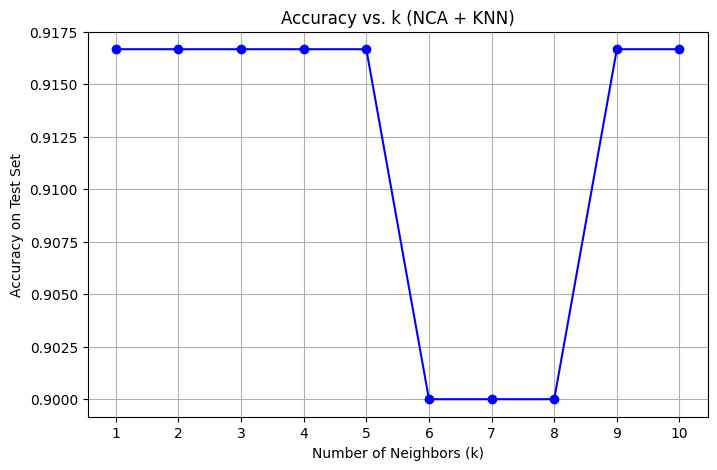

In [25]:

print(nca_pipe.score(X_test, y_test) * 100)

# Store accuracies for each k
k_values = list(range(1, 11))  # k from 1 to 10
accuracies = []

# Loop over different k values
for k in k_values:
    nca = NeighborhoodComponentsAnalysis(random_state=42)
    knn = KNeighborsClassifier(n_neighbors=k)
    pipe = Pipeline([('nca', nca), ('knn', knn)])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Accuracy vs. k (NCA + KNN)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy on Test Set')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### fit_transform(X_train, y_train): Learns a transformation that helps KNN separate the classes better.
### transform(X_train): Applies that transformation to X_train, reducing its dimensionality.
### scatter() plots each class in a different color.

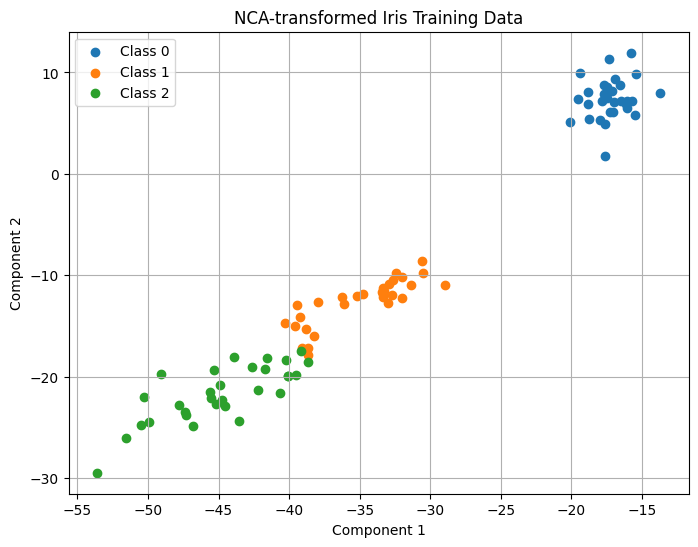

In [26]:


# Transform the data using NCA
X_train_nca = nca.fit_transform(X_train, y_train)

# Plot the transformed training data
plt.figure(figsize=(8, 6))
for label in [0, 1, 2]:
    plt.scatter(X_train_nca[y_train == label, 0],
                X_train_nca[y_train == label, 1],
                label=f"Class {label}")
plt.title("NCA-transformed Iris Training Data")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.show()


## For load Digit

In [27]:
from sklearn.datasets import load_digits

In [28]:
# Load the Iris dataset
digits = load_digits(return_X_y=True)
X, y = digits
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1797, 64)
Shape of y: (1797,)


In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
stratify=y, test_size=0.4, random_state=42)

print("Testing features shape of X:", X_test.shape)
print("Training features shape of X:", X_train.shape)
print("Testing labels shape of Y:", y_test.shape)
print("Training labels shape of Y:", y_train.shape)


Testing features shape of X: (719, 64)
Training features shape of X: (1078, 64)
Testing labels shape of Y: (719,)
Training labels shape of Y: (1078,)


In [30]:
import pandas as pd

df = pd.DataFrame(X, y)
df.shape

(1797, 64)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1797 entries, 0 to 8
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  22      

In [32]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [33]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [34]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
9,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
8,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
9,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0
8,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,8.0,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0


In [35]:
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)

Pipeline(steps=[('nca', NeighborhoodComponentsAnalysis(random_state=42)),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [36]:
print(nca_pipe.score(X_test, y_test) * 100)

98.47009735744089


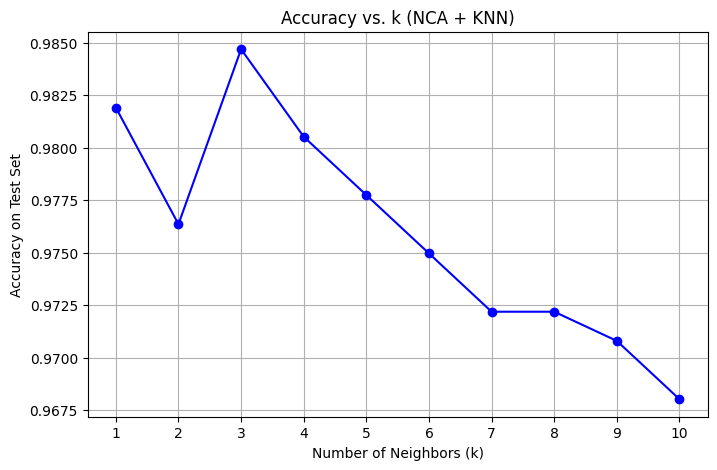

In [37]:
# Store accuracies for each k
k_values = list(range(1, 11))  # k from 1 to 10
accuracies = []

# Loop over different k values
for k in k_values:
    nca = NeighborhoodComponentsAnalysis(random_state=42)
    knn = KNeighborsClassifier(n_neighbors=k)
    pipe = Pipeline([('nca', nca), ('knn', knn)])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Accuracy vs. k (NCA + KNN)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy on Test Set')
plt.xticks(k_values)
plt.grid(True)
plt.show()

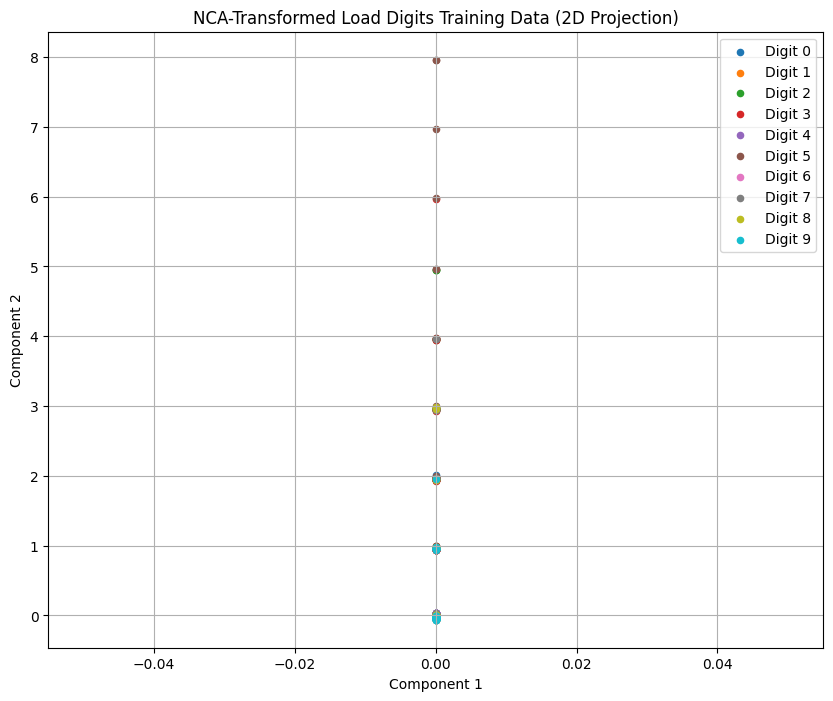

In [38]:
# Transform the data using NCA
X_train_nca = nca.fit_transform(X_train, y_train)

# Plot NCA-transformed training data for all 10 digit classes
plt.figure(figsize=(10, 8))
for label in range(10):  # digits 0–9
    plt.scatter(X_train_nca[y_train == label, 0],
                X_train_nca[y_train == label, 1],
                label=f"Digit {label}", s=20)

plt.title("NCA-Transformed Load Digits Training Data (2D Projection)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.show()